<a href="https://colab.research.google.com/github/Naga-Himaja/Python/blob/Data-Science/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

LOADING AND SPLITTING THE DATA

In [ ]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images : {}'.format(X_train.shape))
print('Testing Images : {}'.format(X_test.shape))

Training Images : (50000, 32, 32, 3)
Testing Images : (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


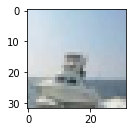

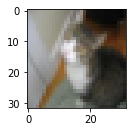

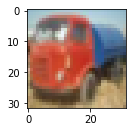

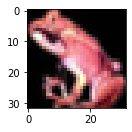

In [ ]:
for i in range(100,104):
  plt.subplot(120 + 1 +i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING THE DATA

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255
n_classes = 10


print("Shape before one-hot encoding : ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding : ",Y_train.shape)  

Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding :  (50000, 10)


BUILDING THE MODEL

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation = 'softmax'))

# compiling
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# training the model
model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 553s 1s/step - loss: 1.5817 - accuracy: 0.4156 - val_loss: 1.1425 - val_accuracy: 0.5928
Epoch 2/10
391/391 [==============================] - 549s 1s/step - loss: 1.1115 - accuracy: 0.6039 - val_loss: 0.9226 - val_accuracy: 0.6774
Epoch 3/10
391/391 [==============================] - 547s 1s/step - loss: 0.9273 - accuracy: 0.6783 - val_loss: 0.8381 - val_accuracy: 0.7040
Epoch 4/10
391/391 [==============================] - 547s 1s/step - loss: 0.8143 - accuracy: 0.7178 - val_loss: 0.7654 - val_accuracy: 0.7362
Epoch 5/10
391/391 [==============================] - 548s 1s/step - loss: 0.7226 - accuracy: 0.7474 - val_loss: 0.7004 - val_accuracy: 0.7573
Epoch 6/10
391/391 [==============================] - 545s 1s/step - loss: 0.6618 - accuracy: 0.7676 - val_loss: 0.6882 - val_accuracy: 0.7588
Epoch 7/10
391/391 [==============================] - 547s 1s/step - loss: 0.6022 - accuracy: 0.7891 - val_loss: 0.6817 - val_accuracy: 0.7660

PREDICTING

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predicitons
predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 58ms/step


In [ ]:
print(predictions)

[[1.02017701e-04 4.30512983e-07 8.70465487e-03 1.26566468e-02
  6.72987878e-01 5.91068417e-02 1.34217189e-04 2.46300191e-01
  5.41772897e-06 1.72329885e-06]
 [1.61428819e-04 7.43767814e-05 5.65826744e-02 3.25652808e-01
  4.87906300e-03 5.46182990e-01 4.76746969e-02 1.83844082e-02
  1.23836944e-04 2.83657311e-04]
 [7.78048616e-06 9.74920476e-06 1.11263571e-03 7.65237026e-04
  3.72845570e-05 1.43613026e-04 9.97837007e-01 6.93017273e-06
  2.95357768e-05 5.01086870e-05]
 [3.98666125e-05 8.88580325e-06 2.63515161e-04 9.22686994e-01
  4.05772775e-02 2.12608650e-03 3.41768526e-02 5.66515591e-05
  3.12848279e-05 3.25882065e-05]
 [3.29920553e-08 9.99782741e-01 1.55366160e-12 9.62693925e-10
  5.58630468e-15 7.87151702e-13 6.27012418e-12 3.83180277e-13
  3.89201750e-06 2.13395600e-04]
 [1.09974243e-08 9.99994874e-01 4.53615357e-12 2.95855285e-11
  2.09881754e-14 3.35128084e-13 1.84951620e-11 1.28177557e-14
  1.04285994e-06 4.02668684e-06]
 [5.35684898e-02 7.13366969e-03 2.52269432e-02 5.65832973e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
0.99999994
0.99999994
1.0
1.0000001
0.99999994
0.99999994
1.0
1.0


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION

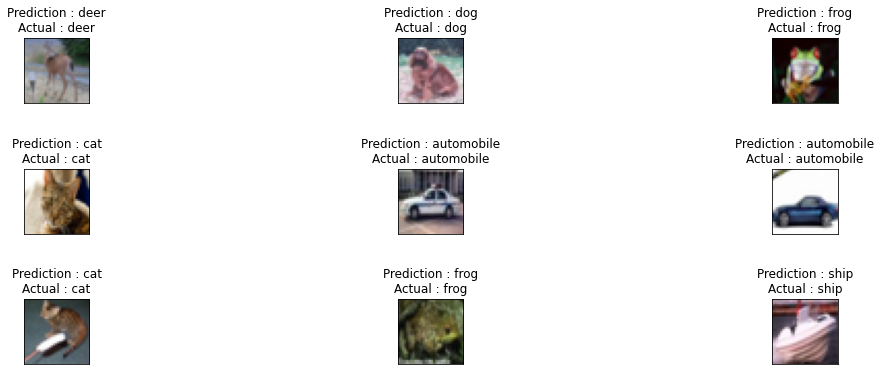

In [ ]:

fig, axs = plt.subplots(3,3,figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if(class_result[i] == key):
      title = 'Prediction : {}\nActual : {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
    
  #plot the imag
  axs[i].imshow(img)

#show the plot
plt.show()

